<a href="https://colab.research.google.com/github/kdemertzis/LNexamples/blob/main/YOLOv3_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Object Detection with YOLO v3

This notebook uses a [PyTorch port](https://github.com/ayooshkathuria/pytorch-yolo-v3) of [YOLO v3](https://pjreddie.com/darknet/yolo/) to detect objects on a given image.



## Install ayooshkathuria/pytorch-yolo-v3

In [ ]:
import os
from os.path import exists, join, basename, splitext

git_repo_url = 'https://github.com/ayooshkathuria/pytorch-yolo-v3.git'
project_name = splitext(basename(git_repo_url))[0]
if not exists(project_name):
  # clone and install dependencies
  !git clone -q $git_repo_url
  #!cd $project_name && pip install -q -r requirement.txt
  
import sys
sys.path.append(project_name)
import time
import matplotlib
import matplotlib.pylab as plt
plt.rcParams["axes.grid"] = False

## Download official YOLO v3 pretrained weights

In [ ]:
if not exists('yolov3.weights'):
  !wget -q https://pjreddie.com/media/files/yolov3.weights

## Detect objects on a test image

First, dowload a test image from internet:

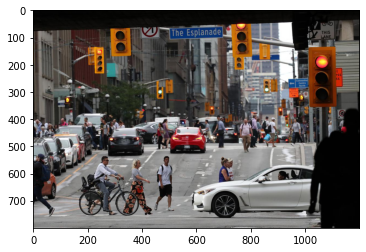

In [ ]:
IMAGE_URL = 'https://www.thestar.com/content/dam/thestar/news/gta/2019/09/02/5-myths-about-pedestrian-collisions-that-could-be-making-it-harder-to-end-road-deaths/main.jpg'


image_file = basename(IMAGE_URL)
!wget -q -O $image_file $IMAGE_URL
plt.imshow(matplotlib.image.imread(image_file))

Execute `detect.py` on that image and show the result:

Loading network.....
Network successfully loaded
main.jpg             predicted in  0.088 seconds
Objects Detected:    person person person person person person person person person person person person person person person person person bicycle bicycle car car car car car car car traffic light traffic light traffic light traffic light traffic light traffic light traffic light
----------------------------------------------------------

SUMMARY
----------------------------------------------------------
Task                     : Time Taken (in seconds)

Reading addresses        : 0.000
Loading batch            : 0.111
Detection (1 images)     : 0.098
Output Processing        : 0.000
Drawing Boxes            : 0.030
Average time_per_img     : 0.240
----------------------------------------------------------


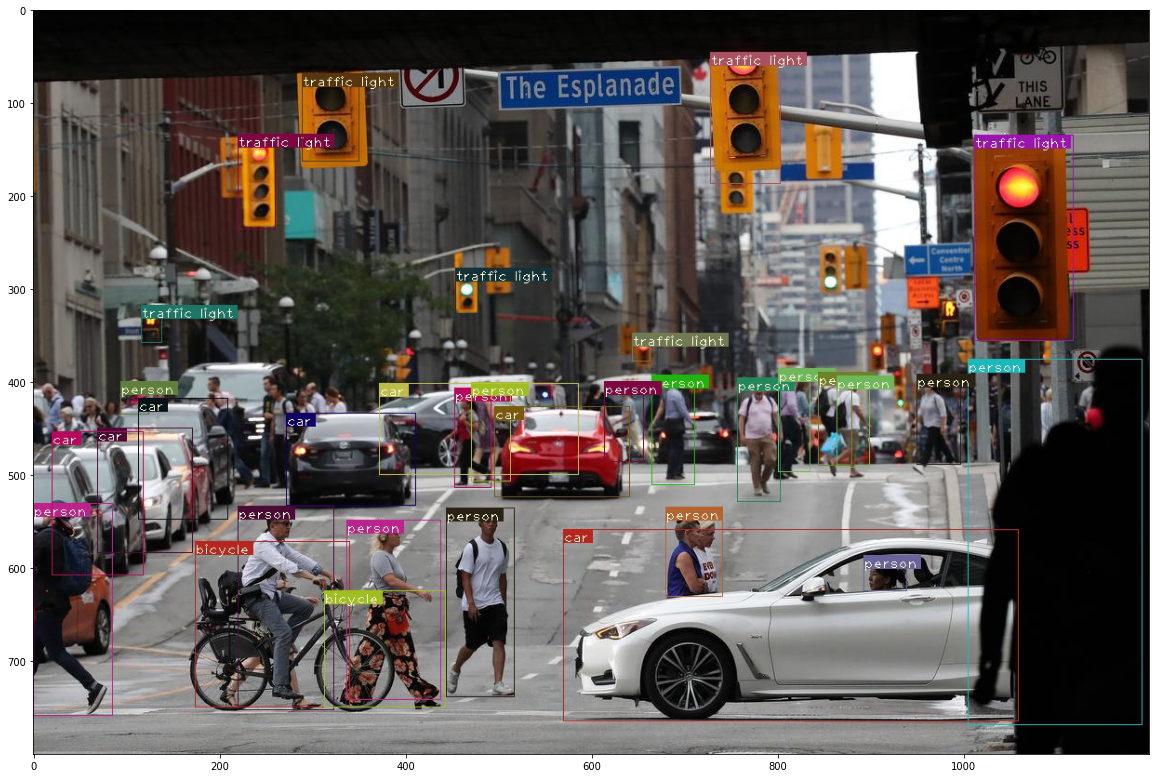

In [ ]:
!cd pytorch-yolo-v3 && python detect.py --weights ../yolov3.weights --images ../$image_file --det ..

plt.figure(figsize=(20, 15))
plt.imshow(matplotlib.image.imread('det_%s' % image_file))